# **BHARAT INTERN**

### **Task 2**
Handwritten Number Recognition using MNIST dataset

In [1]:
#Import necessary libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
# Load MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Display the shape of the test dataset
X_test.shape

(10000, 28, 28)

In [4]:
# Display the label in the training data set
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

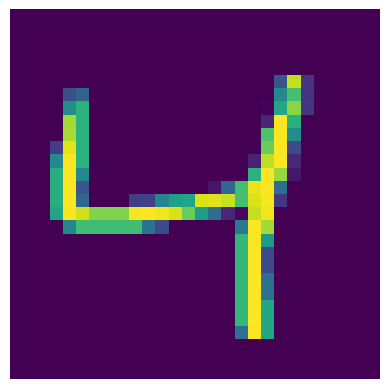

In [5]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Display an image from the training set
plt.imshow(X_train[2])
plt.axis('off')

In [6]:
#Normalize the pixel values to a range between 0 and 1
X_train = X_train/255
X_test = X_test/255

# Display normalized pixel values of the first image
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
# Train the model and store training history
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2842 - accuracy: 0.9162 - val_loss: 0.1490 - val_accuracy: 0.9556
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1217 - accuracy: 0.9630 - val_loss: 0.1050 - val_accuracy: 0.9674
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.1003 - val_accuracy: 0.9675
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0625 - accuracy: 0.9802 - val_loss: 0.0965 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0474 - accuracy: 0.9845 - val_loss: 0.1171 - val_accuracy: 0.9660
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0935 - val_accuracy: 0.9735
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 0.0995 - val_accuracy

In [11]:
# Make predictions on the test data
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
# Get the predicted labels by selecting the class with the highest probability
y_pred = y_prob.argmax(axis=1)

In [13]:
# Import accuracy_score for calculating accuracy
from sklearn.metrics import accuracy_score

# Calculate and display accuracy score
accuracy_score(y_test,y_pred)

0.9773

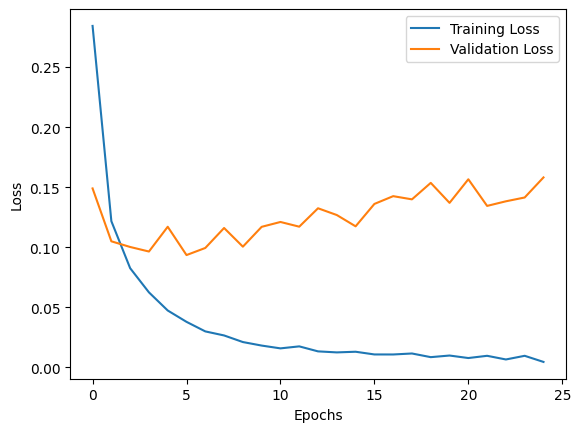

In [14]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

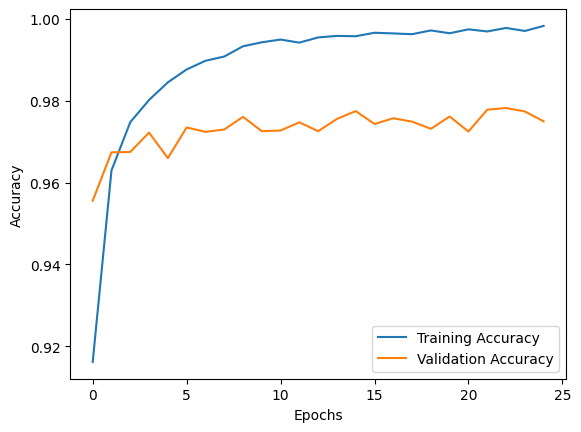

In [15]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

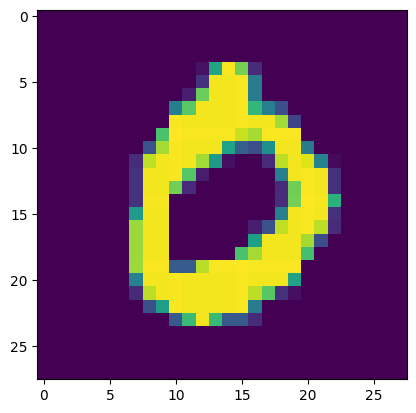

In [16]:
# Display an image from the test set
plt.imshow(X_test[3])

In [17]:
# Make a prediction on a single test image and display the predicted label
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([0])